In [1]:
using HDF5, JLD
using Plots;

In [2]:
Ntr_array = [50 + 50*i for i in 0:16]

D = 6 # parameters["original feature space dim"]
noise = 0.0 # parameters["mps noise weigth"]
f = 3 # parameters["feature mapping dimensionality"]
a = 0.3;

In [3]:
m_test = []
std_test = []
m_train = []
std_train= []

for Ntr in Ntr_array
    # load the results
    name = "pseudoinv_losses_Ntr_$(Ntr)_a_$(a)"
    f = jldopen("Results/" * name, "r") do file
            read(file, name)
    end

    m_test_results = f["test mean"]
    std_test_results = f["test std"]
    m_train_results = f["train mean"]
    std_train_results = f["train std"]
    
    append!(m_test, [m_test_results])
    append!(std_test, [std_test_results])
    append!(m_train, [m_train_results])
    append!(std_train, [std_train_results])
end

In [4]:
Ntr_array[6]

300

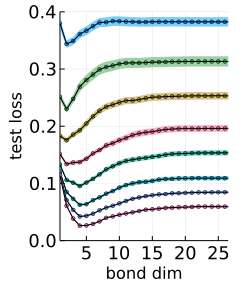

In [11]:
# plot and save the results
plot()

for i in 1:8
    plot!(m_test[i], ribbon=(std_test[i], std_test[i]), 
            label="", marker =:o, markersize = 2)
    plot!(m_test[i], color = "black",  xtickfont = font(12, "Arial"), #line = (2, :solid), 
        ytickfont = font(12, "Arial"), label="")#, yaxis =:log)
end

# annotate!(29, 12, text("a=$(a)", :black, :right, :bottom, 12))
ylims!(0.0, 0.4)
xlims!(1, 26.5)
plot!(size=(240., 300.), xlabel = "bond dim", 
        ylabel ="test loss", )
#         yticks = [i/100 for i in 0:2:10])

In [6]:
savefig("test_loss_inversion_few_Ntr.pdf")

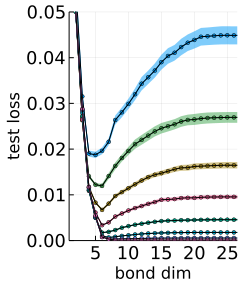

In [7]:
# plot and save the results
plot()

for i in 9:16
    plot!(m_test[i], ribbon=(std_test[i], std_test[i]), 
            label="", marker =:o, markersize = 2)
    plot!(m_test[i], color = "black",  xtickfont = font(12, "Arial"), #line = (2, :solid), 
        ytickfont = font(12, "Arial"), label="")#, yaxis =:log)
end

# annotate!(29, 12, text("a=$(a)", :black, :right, :bottom, 12))
ylims!(0.0, 0.05)
xlims!(1, 26.5)
plot!(size=(249.2, 300.), xlabel = "bond dim", 
        ylabel ="test loss", )
#         yticks = [i/100 for i in 0:2:10])

In [8]:
savefig("test_loss_inversion_few_Ntr.pdf")

In [9]:
m_test[16,:]

1-element Array{Any,1}:
 [0.12303820025474431, 0.05022579699846205, 0.028766868449643778, 0.011702223825212703, 0.00547027207213185, 0.0007497791807367306, 0.00034392741311235005, 9.84241278970777e-5, 9.637858857393887e-5, 9.515551090322666e-5  …  0.0001167568652887338, 0.00011668827052112214, 0.00011699657292218139, 0.00011692118219171701, 0.00011714814614665685, 0.00011720295638005589, 0.0001172144978180476, 0.0001172144978180476, 0.0001172144978180476, 0.0001172144978180476]